# Pivot de gauss avec numpy

Etape par étape, le pivote de Gauss implémenté en python puis avec numpy.

In [1]:
%matplotlib inline

## Python

In [2]:
import numpy

In [3]:
def pivot_gauss(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = -m[j, i - 1] / m[i - 1, i - 1]
            for k in range(i - 1, m.shape[1]):
                m[j, k] += coef * m[i - 1, k]
    return m


m = numpy.random.rand(4, 4)
piv = pivot_gauss(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.21287505,  0.52366039,  0.80354581,  0.41810413],
       [ 0.        , -1.67221432, -2.60484376, -0.90041526],
       [ 0.        ,  0.        , -0.44418202,  0.21029843],
       [ 0.        ,  0.        ,  0.        , -0.30863963]])

`* (numpy.abs(piv) > 1e-10)` sert à simplifier l'affichage des valeurs quasi nulles.

## Numpy 1

In [4]:
def pivot_gauss2(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = -m[j, i - 1] / m[i - 1, i - 1]
            m[j, i - 1 :] += m[i - 1, i - 1 :] * coef
    return m


piv = pivot_gauss2(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.21287505,  0.52366039,  0.80354581,  0.41810413],
       [ 0.        , -1.67221432, -2.60484376, -0.90041526],
       [ 0.        ,  0.        , -0.44418202,  0.21029843],
       [ 0.        ,  0.        ,  0.        , -0.30863963]])

## Numpy 2

In [5]:
def pivot_gauss3(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i - 1] == 0:
            j0 += 1
        coef = -m[j0:, i - 1] / m[i - 1, i - 1]
        m[j0:, i - 1 :] += coef.reshape((-1, 1)) * m[i - 1, i - 1 :].reshape((1, -1))
    return m


piv = pivot_gauss3(m)
piv * (numpy.abs(piv) > 1e-10)

array([[ 0.21287505,  0.52366039,  0.80354581,  0.41810413],
       [ 0.        , -1.67221432, -2.60484376, -0.90041526],
       [ 0.        ,  0.        , -0.44418202,  0.21029843],
       [ 0.        ,  0.        ,  0.        , -0.30863963]])

## Vitesse

In [6]:
from cpyquickhelper.numbers import measure_time
from tqdm import tqdm
import pandas

data = []
for n in tqdm([10, 20, 30, 40, 50, 60, 70, 80, 100]):
    m = numpy.random.rand(n, n)
    if n < 50:
        res = measure_time(lambda: pivot_gauss(m), number=10, repeat=10)
        res.update(dict(name="python", n=n))
        data.append(res)
    res = measure_time(lambda: pivot_gauss2(m), number=10, repeat=10)
    res.update(dict(name="numpy1", n=n))
    data.append(res)
    res = measure_time(lambda: pivot_gauss3(m), number=10, repeat=10)
    res.update(dict(name="numpy2", n=n))
    data.append(res)

df = pandas.DataFrame(data)
df

ModuleNotFoundError: No module named 'cpyquickhelper'

In [ ]:
piv = df.pivot(index="n", columns="name", values="average")
piv

name    numpy1    numpy2    python
n                                 
10    0.000454  0.001363  0.000674
20    0.000841  0.001814  0.001038
30    0.003207  0.002815  0.013065
40    0.012710  0.005585  0.053362
50    0.024682  0.007721       NaN
60    0.038531  0.009483       NaN
70    0.042429  0.011983       NaN
80    0.084926  0.015445       NaN
100   0.137455  0.025048       NaN

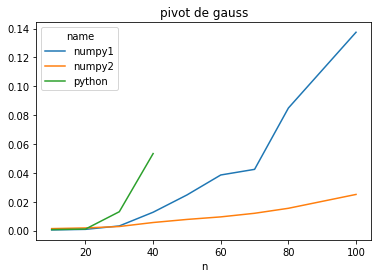

In [ ]:
piv.plot(title="pivot de gauss");